1. Read and display the image.

In [ ]:
from PIL import Image

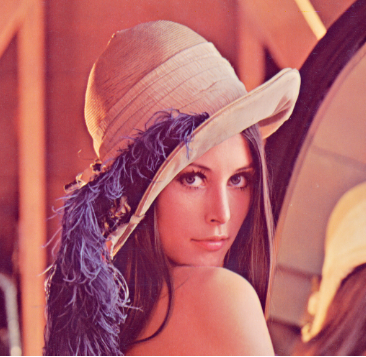

In [ ]:
img= Image.open("/content/drive/MyDrive/AI ML/Worksheet1/lenna_image.png")
display(img)


2. Display only the top left corner of 100x100 pixels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

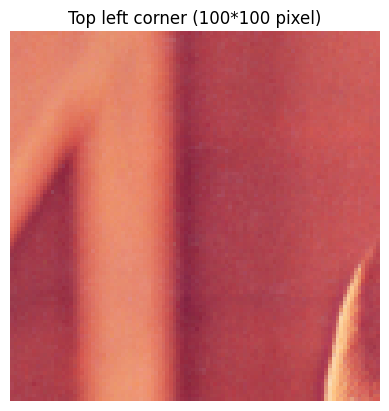

In [ ]:
image_array = np.array(img)


# Extract the top-left 100x100 pixels
top_left = image_array[:100, :100]

plt.imshow(top_left)
plt.title("Top left corner (100*100 pixel)")
plt.axis('off')
plt.show()


3. Show the three color channels (R, G, B).

In [ ]:
import numpy as np
image_array = np.array(img)

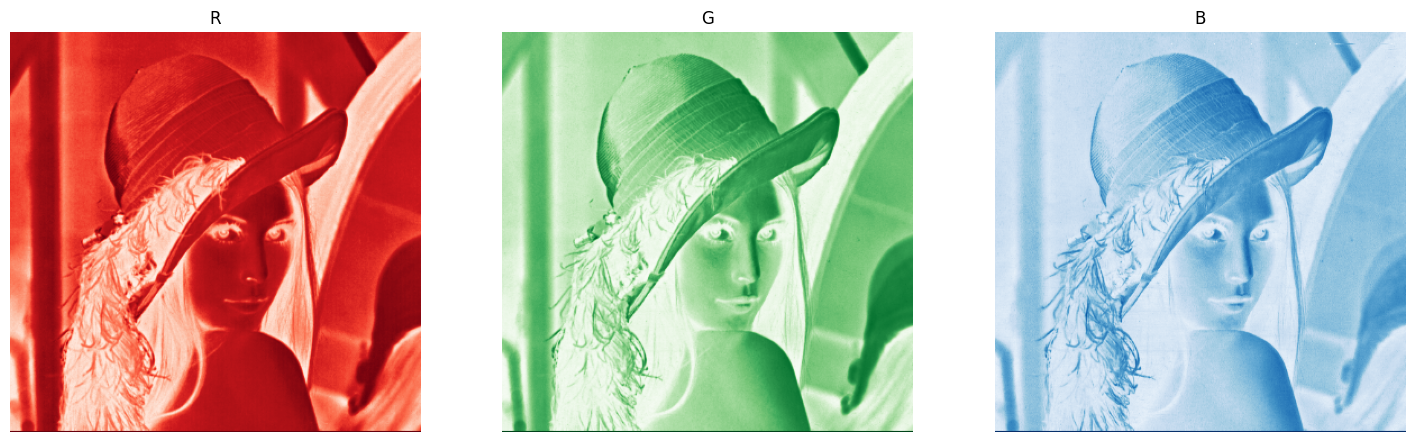

In [ ]:
#accessing individual color channel
red_channel = image_array[:,:,0]
green_channel = image_array[:,:,1]
blue_channel = image_array[:,:,2]

# Display each channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("R")
axes[0].axis('off')

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("G")
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("B")
axes[2].axis('off')

plt.show()



Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

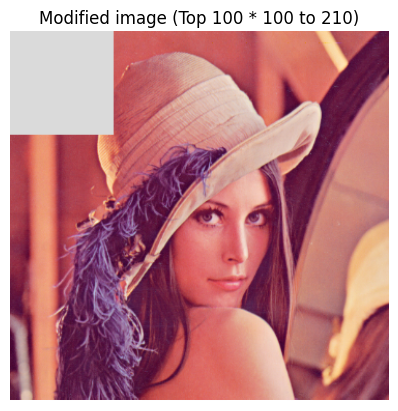

In [ ]:
# modify the top 100x100 pixels to 210
image_array[:100, :100] = 210
modified_img = Image.fromarray(image_array)

#display image
plt.imshow(modified_img)
plt.axis('off')
plt.title("Modified image (Top 100 * 100 to 210)")
plt.show()

# **2.2 Exercise - 2**

Load and display a grayscale image.

In [ ]:
from PIL import Image

In [ ]:
gray_img = Image.open("/content/drive/MyDrive/AI ML/Worksheet1/cameraman.png")

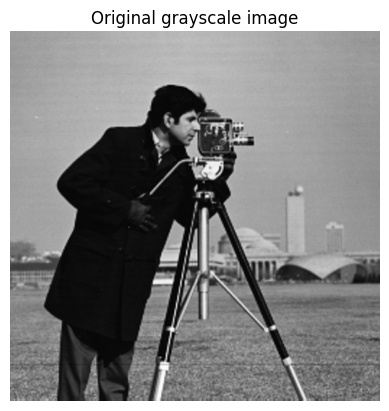

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(gray_img, cmap="gray")
plt.axis('off')
plt.title("Original grayscale image")
plt.show()

2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

In [ ]:
import numpy as np

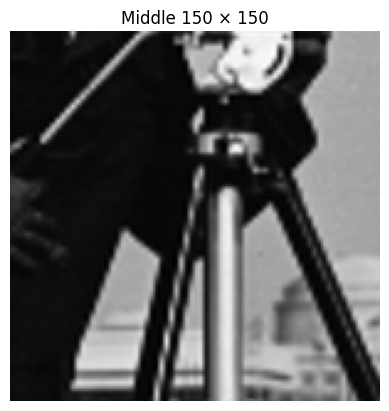

In [ ]:
grayimg_array = np.array(gray_img)
height, width = grayimg_array.shape

#calculating the mid section of the image
upper= (height - 150) // 2
left = (width - 150) // 2
right = left+150
lower=upper+150

#extract middle part of image 150 px
middle_sec = grayimg_array[upper:lower, left:right]

plt.imshow(middle_sec, cmap="gray")
plt.axis('off')
plt.title("Middle 150 × 150")
plt.show()

Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

*   Apply a threshold to the grayscale image: set all pixel values below 100 to 0 and all value above 100 to 255 (creating a binary image).

*   Display the resulting binary image.


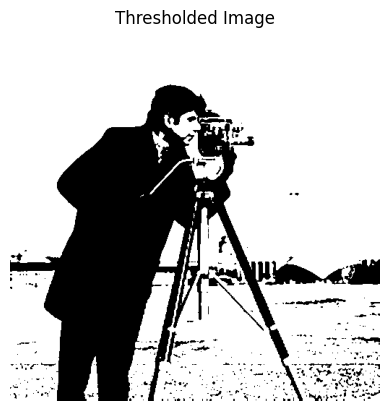

In [ ]:
# Set values below 100 to 0, and values above 100 to 255
threshold = np.where(grayimg_array < 100, 0, 255).astype(np.uint8)

#display
plt.imshow(threshold, cmap="gray")
plt.axis('off')
plt.title("Thresholded Image")
plt.show()

**4. Rotate the image 90 degrees clockwise and display the result.**


*   Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
*  Display the rotated image using matplotlib.



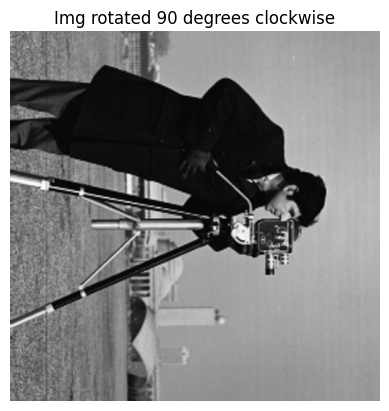

In [ ]:
#rotate img using pillowrotate method in 90 degrees clockwise
img_rotate = gray_img.rotate(-90)

plt.imshow(img_rotate, cmap="gray")
plt.axis('off')
plt.title("Img rotated 90 degrees clockwise")
plt.show()

**5. Convert the grayscale image to an RGB image.**


*   Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
*   Display the converted RGB image using matplotlib.



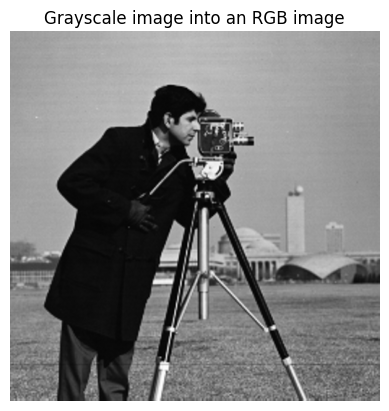

In [ ]:
#Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B).

rgb_img = gray_img.convert("RGB")

#display image using matplot
plt.imshow(rgb_img, cmap="gray")
plt.axis('off')
plt.title("Grayscale image into an RGB image")
plt.show()

# 3 Image Compression and Decompression using PCA.

**1. Load and Prepare Data:**


* Fetch an image of you choice.{If colour convert to grayscale}
*  Center the dataset - Standaridze the Data.
*  Calculate the covaraince matrix of the Standaridze data.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load image
original_image = Image.open("/content/drive/MyDrive/AI ML/Worksheet1/cupcake.jpg").convert("L")

image_array = np.array(original_image)
print(image_array.shape)

height, width = image_array.shape
#data = image_array.reshape(height, width)
data = image_array.copy()


(251, 201)


In [ ]:
#comput the mean of each column
mean = np.mean(data, axis=0)
#substract mean to center the data
centered_data = data-mean
centered_data.shape

(251, 201)

In [ ]:
cov_matrix = np.cov(centered_data, rowvar=False)
cov_matrix.shape

(201, 201)

**2. Eigen Decomposition and Identifying Principal Components:**


*   Compute Eigen Values and Eigen Vectors.
*  Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.
*  Identify the Principal Components with the help of cumulative Sum plot.

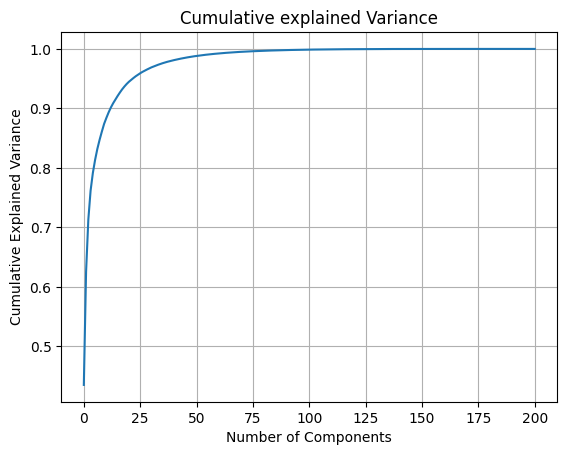

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance_ratio = eigenvalues/np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

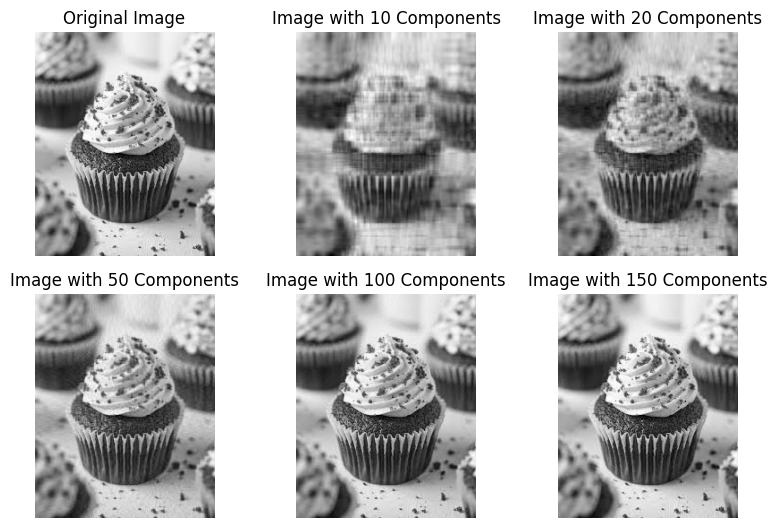

In [ ]:
# List of k values to compare
k = [10, 20, 50, 100, 150]

# Create a figure with subplots
plt.figure(figsize=(8,8))
#Original Image
plt.subplot(3, 3, 1)  # Use a 2x3 grid, position 1
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

for i, k in enumerate(k):
    # Select top k principal components
    components = eigenvectors[:, :k]

    # Compress the image
    compressed_data = np.dot(centered_data, components)

    # Decompress the image
    decompressed_data = np.dot(compressed_data, components.T) + mean

    # Plot the decompressed image
    plt.subplot(3, 3, i + 2)
    plt.imshow(decompressed_data, cmap="gray")
    plt.title(f"Image with {k} Components")
    plt.axis("off")

# Show the images
plt.tight_layout()
plt.show()